## Spaceship Titanic

Predict which passengers are transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To make these predictions, there's a set of personal records recovered from the ship's damaged computer system.

Dataset obtained from <a href="https://www.kaggle.com/c/spaceship-titanic/overview">this link</a> on Kaggle.

### Description
 
Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

<div align="center">
<img src="https://storage.googleapis.com/kaggle-media/competitions/Spaceship%20Titanic/joel-filipe-QwoNAhbmLLo-unsplash.jpg" width=50%/>
</div>

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

Help save them and change history!

Acknowledgments
Photos by <a href="https://unsplash.com/@joelfilip?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Joel Filipe</a>, <a href="https://unsplash.com/@uncle_rickie?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Richard Gatley</a> and <a href="https://unsplash.com/@actionvance?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">ActionVance</a> on Unsplash.

### Dataset Information

- ***train.csv*** - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
    - **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
    - **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.
    - **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
    - **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
    - **Destination** - The planet the passenger will be debarking to.
    - **Age** - The age of the passenger.
    - **VIP** - Whether the passenger has paid for special VIP service during the voyage.
    - **RoomService**, **FoodCourt**, **ShoppingMall**, **Spa**, **VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
    - **Name** - The first and last names of the passenger.
    - **Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
- ***test.csv*** - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.



In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv('data/train.csv', index_col='PassengerId');

## Training Dataset

In [3]:
df_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 891.4+ KB


In [5]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
df_train.isna().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

## Dividing Categorical and Numerical Data

In [7]:
df_train.nunique()

HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [8]:
# df_train['Transported'] = df_train['Transported'].map({False : 0, True: 1})

X = df_train.drop(columns=['Name', 'Transported'], axis=1);
y = df_train['Transported'];

num_cols = [col for col in X.columns if X[col].dtypes != 'object']
# cat_cols = list(X_train.select_dtypes(include=['object']).columns)
cat_cols = [col for col in X.columns if X[col].dtypes == 'object' and X[col].nunique() <= 10];

print('Numerical cols: ', num_cols)
print('Categorical cols: ', cat_cols)

Numerical cols:  ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
Categorical cols:  ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']


In [9]:
y.unique()

array([False,  True])

In [10]:
# excluding cabin (more than 10 cardinality)
X = X[num_cols + cat_cols]

In [11]:
from sklearn.model_selection import train_test_split;
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=40);

## Visualization


In [12]:
import seaborn as sns

In [13]:
y.value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

C:\Users\annel\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


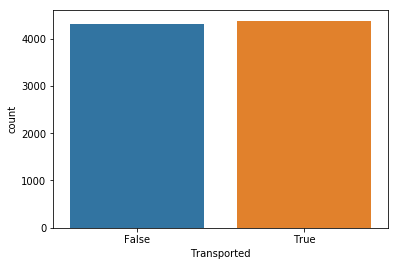

In [14]:
sns.countplot(y);

In [15]:
df_only_num = df_train[num_cols + ['Transported']].copy()
df_only_num.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
PassengerId,,,,,,,
0001_01,39.0,0.0,0.0,0.0,0.0,0.0,False
0002_01,24.0,109.0,9.0,25.0,549.0,44.0,True
0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,False
0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,False
0004_01,16.0,303.0,70.0,151.0,565.0,2.0,True


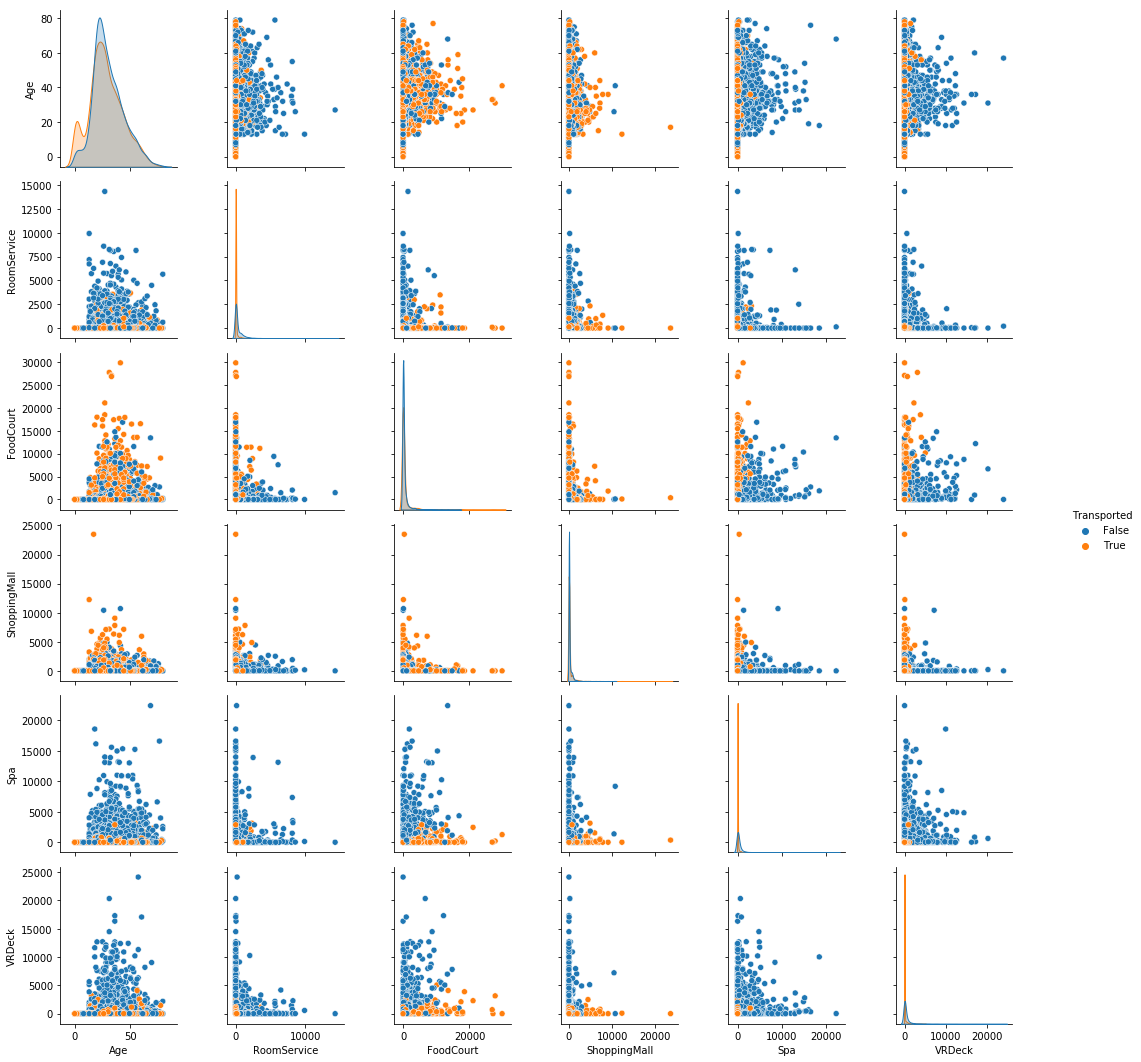

In [16]:
sns.pairplot(data=df_only_num, hue='Transported')

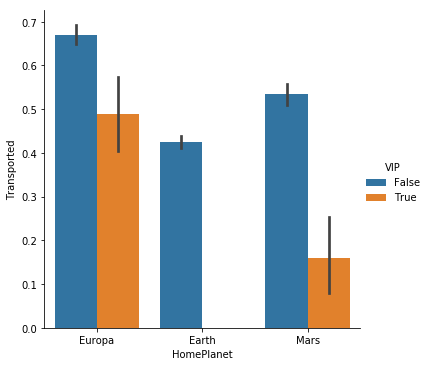

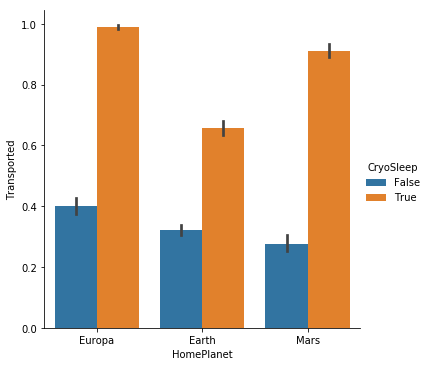

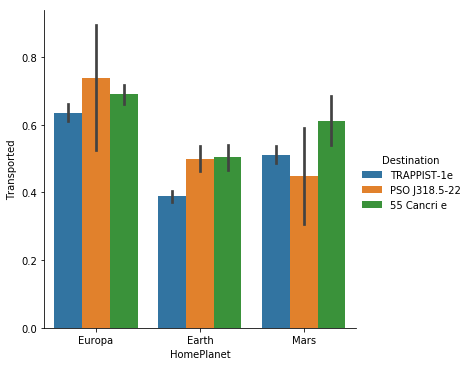

In [17]:
# ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
# VIP - Whether the passenger has paid for special VIP service during the voyage.
sns.catplot(x="HomePlanet", y="Transported", hue="VIP", kind="bar", data=df_train)
# CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. 
# Passengers in cryosleep are confined to their cabins.
sns.catplot(x="HomePlanet", y="Transported", hue="CryoSleep", kind="bar", data=df_train)
# Destination - The planet the passenger will be debarking to.
sns.catplot(x="HomePlanet", y="Transported", hue="Destination", kind="bar", data=df_train)

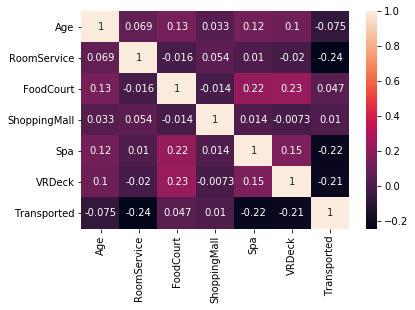

In [18]:
sns.heatmap(df_train.corr(), annot=True)

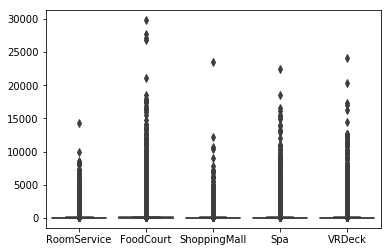

In [19]:
sns.boxplot(data=df_only_num.drop(['Age', 'Transported'], axis=1))

## Handle missing data and categorial data

In [20]:
from sklearn.impute import SimpleImputer;
from sklearn.preprocessing import OneHotEncoder;

In [21]:
numerical_imputer = SimpleImputer(strategy='mean');
categorical_imputer = SimpleImputer(strategy='most_frequent');
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [22]:
X_train_final = X_train.copy()
X_valid_final = X_valid.copy()

#### Numerical

In [23]:
X_train_final.loc[:, num_cols] = numerical_imputer.fit_transform(X_train[num_cols]);
X_valid_final.loc[:, num_cols] = numerical_imputer.transform(X_valid[num_cols]);

In [24]:
X_train_final.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet,CryoSleep,Destination,VIP
PassengerId,,,,,,,,,,
8103_01,34.0,81.0,0.0,492.000000,122.0,0.0,Mars,False,TRAPPIST-1e,False
0991_01,27.0,0.0,0.0,0.000000,0.0,0.0,Earth,True,TRAPPIST-1e,NaN
6028_04,26.0,0.0,3638.0,0.000000,1043.0,0.0,Europa,False,TRAPPIST-1e,True
0714_03,12.0,0.0,0.0,177.456019,0.0,0.0,Earth,False,NaN,False
8467_01,14.0,0.0,0.0,0.000000,0.0,0.0,Earth,True,55 Cancri e,False


In [25]:
X_train_final.isna().sum()

Age               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
HomePlanet      151
CryoSleep       159
Destination     134
VIP             151
dtype: int64

In [26]:
X_valid_final.isna().sum()

Age              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
HomePlanet      50
CryoSleep       58
Destination     48
VIP             52
dtype: int64

#### Categorical

In [27]:
X_train_final.loc[:, cat_cols] = categorical_imputer.fit_transform(X_train[cat_cols]);
X_valid_final.loc[:, cat_cols] = categorical_imputer.transform(X_valid[cat_cols]);

In [28]:
X_train_final[cat_cols].head()

,HomePlanet,CryoSleep,Destination,VIP
PassengerId,,,,
8103_01,Mars,False,TRAPPIST-1e,False
0991_01,Earth,True,TRAPPIST-1e,False
6028_04,Europa,False,TRAPPIST-1e,True
0714_03,Earth,False,TRAPPIST-1e,False
8467_01,Earth,True,55 Cancri e,False


In [29]:
X_train_final.isna().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
HomePlanet      0
CryoSleep       0
Destination     0
VIP             0
dtype: int64

In [30]:
X_valid_final.isna().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
HomePlanet      0
CryoSleep       0
Destination     0
VIP             0
dtype: int64

In [31]:
ohe_train = pd.DataFrame(ohe.fit_transform(X_train_final[cat_cols]));
ohe_valid = pd.DataFrame(ohe.transform(X_valid_final[cat_cols]));

In [32]:
# One-hot encoding removed index
ohe_train.index = X_train_final.index;
ohe_valid.index = X_valid_final.index;

In [33]:
ohe_train.columns = ohe.get_feature_names()
ohe_valid.columns = ohe.get_feature_names()
ohe_train.head()

,x0_Earth,x0_Europa,x0_Mars,x1_False,x1_True,x2_55 Cancri e,x2_PSO J318.5-22,x2_TRAPPIST-1e,x3_False,x3_True
PassengerId,,,,,,,,,,
8103_01,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
0991_01,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
6028_04,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
0714_03,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
8467_01,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [34]:
X_train_final.loc['0991_01']

Age                      27
RoomService               0
FoodCourt                 0
ShoppingMall              0
Spa                       0
VRDeck                    0
HomePlanet            Earth
CryoSleep              True
Destination     TRAPPIST-1e
VIP                   False
Name: 0991_01, dtype: object

In [35]:
# Remove categorical columns
num_x_train = X_train_final.drop(cat_cols, axis=1)
num_x_valid = X_valid_final.drop(cat_cols, axis=1)

In [36]:
# Add one-hot encoded columns to numerical features
X_train_final = pd.concat([num_x_train, ohe_train], axis=1)
X_valid_final = pd.concat([num_x_valid, ohe_valid], axis=1)

In [37]:
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6519 entries, 8103_01 to 8129_04
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               6519 non-null   float64
 1   RoomService       6519 non-null   float64
 2   FoodCourt         6519 non-null   float64
 3   ShoppingMall      6519 non-null   float64
 4   Spa               6519 non-null   float64
 5   VRDeck            6519 non-null   float64
 6   x0_Earth          6519 non-null   float64
 7   x0_Europa         6519 non-null   float64
 8   x0_Mars           6519 non-null   float64
 9   x1_False          6519 non-null   float64
 10  x1_True           6519 non-null   float64
 11  x2_55 Cancri e    6519 non-null   float64
 12  x2_PSO J318.5-22  6519 non-null   float64
 13  x2_TRAPPIST-1e    6519 non-null   float64
 14  x3_False          6519 non-null   float64
 15  x3_True           6519 non-null   float64
dtypes: float64(16)
memory usage: 1.2+ MB


In [38]:
X_valid_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2174 entries, 8659_01 to 8388_01
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               2174 non-null   float64
 1   RoomService       2174 non-null   float64
 2   FoodCourt         2174 non-null   float64
 3   ShoppingMall      2174 non-null   float64
 4   Spa               2174 non-null   float64
 5   VRDeck            2174 non-null   float64
 6   x0_Earth          2174 non-null   float64
 7   x0_Europa         2174 non-null   float64
 8   x0_Mars           2174 non-null   float64
 9   x1_False          2174 non-null   float64
 10  x1_True           2174 non-null   float64
 11  x2_55 Cancri e    2174 non-null   float64
 12  x2_PSO J318.5-22  2174 non-null   float64
 13  x2_TRAPPIST-1e    2174 non-null   float64
 14  x3_False          2174 non-null   float64
 15  x3_True           2174 non-null   float64
dtypes: float64(16)
memory usage: 288.7+ KB

## Training

In [39]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier;
from sklearn.tree import DecisionTreeClassifier;
from sklearn.neighbors import KNeighborsClassifier;
from sklearn.svm import SVC;
from sklearn.neural_network import MLPClassifier;
from xgboost import XGBClassifier;


from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report;

### Decision Tree

              precision    recall  f1-score   support

       False       0.80      0.73      0.77      1107
        True       0.75      0.81      0.78      1067

    accuracy                           0.77      2174
   macro avg       0.77      0.77      0.77      2174
weighted avg       0.77      0.77      0.77      2174



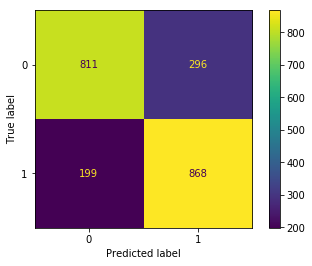

In [40]:
dt = DecisionTreeClassifier(random_state=40, min_samples_split=300)
dt.fit(X_train_final, y_train)
dt_pred = dt.predict(X_valid_final);
print(classification_report(y_valid, dt_pred))
dtcm = confusion_matrix(y_valid, dt_pred);
ConfusionMatrixDisplay(confusion_matrix=dtcm).plot()

### Random Forest

              precision    recall  f1-score   support

       False       0.81      0.78      0.80      1107
        True       0.78      0.81      0.79      1067

    accuracy                           0.79      2174
   macro avg       0.80      0.80      0.79      2174
weighted avg       0.80      0.79      0.79      2174



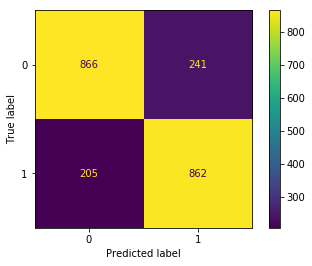

In [41]:
rf = RandomForestClassifier(random_state=40, n_estimators=500, min_samples_split=30)
rf.fit(X_train_final, y_train)
rf_pred = rf.predict(X_valid_final);
print(classification_report(y_valid, rf_pred))
rfcm = confusion_matrix(y_valid, rf_pred);
ConfusionMatrixDisplay(confusion_matrix=rfcm).plot()

### Adaboost

              precision    recall  f1-score   support

       False       0.82      0.74      0.78      1107
        True       0.76      0.83      0.79      1067

    accuracy                           0.78      2174
   macro avg       0.79      0.78      0.78      2174
weighted avg       0.79      0.78      0.78      2174



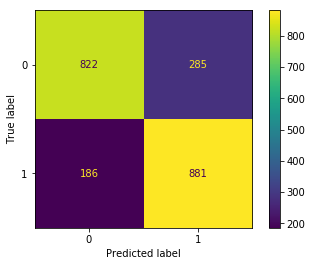

In [42]:
ada = AdaBoostClassifier(random_state=40, n_estimators=150)
ada.fit(X_train_final, y_train)
ada_pred = ada.predict(X_valid_final);
print(classification_report(y_valid, ada_pred))
adacm = confusion_matrix(y_valid, ada_pred);
ConfusionMatrixDisplay(confusion_matrix=adacm).plot()

### Extra Tree

              precision    recall  f1-score   support

       False       0.81      0.78      0.80      1107
        True       0.78      0.81      0.79      1067

    accuracy                           0.79      2174
   macro avg       0.80      0.80      0.79      2174
weighted avg       0.80      0.79      0.79      2174



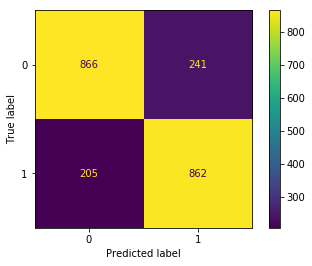

In [43]:
et = ExtraTreesClassifier(random_state=40, n_estimators=500, min_samples_split=10)
et.fit(X_train_final, y_train)
et_pred = rf.predict(X_valid_final);
print(classification_report(y_valid, et_pred))
etcm = confusion_matrix(y_valid, et_pred);
ConfusionMatrixDisplay(confusion_matrix=etcm).plot()

### XGBoost

              precision    recall  f1-score   support

       False       0.81      0.78      0.80      1107
        True       0.78      0.81      0.79      1067

    accuracy                           0.79      2174
   macro avg       0.80      0.80      0.79      2174
weighted avg       0.80      0.79      0.79      2174



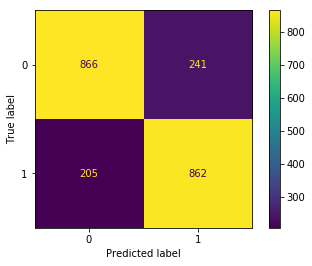

In [44]:
xgb = XGBClassifier(use_label_encoder=False)
xgb.fit(X_train_final, y_train, eval_metric='logloss')
xgb_pred = rf.predict(X_valid_final);
print(classification_report(y_valid, xgb_pred))
xgbcm = confusion_matrix(y_valid, xgb_pred);
ConfusionMatrixDisplay(confusion_matrix=xgbcm).plot()

### MLP

              precision    recall  f1-score   support

       False       0.81      0.78      0.80      1107
        True       0.78      0.81      0.79      1067

    accuracy                           0.79      2174
   macro avg       0.80      0.80      0.79      2174
weighted avg       0.80      0.79      0.79      2174



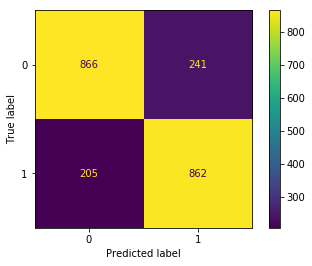

In [45]:
mlp = MLPClassifier(
    hidden_layer_sizes=(50, 10, 50),
    activation='relu',
    max_iter=500,
    batch_size=240,
    random_state=40
)
mlp.fit(X_train_final, y_train)
mlp_pred = rf.predict(X_valid_final);
print(classification_report(y_valid, mlp_pred))
mlpcm = confusion_matrix(y_valid, mlp_pred);
ConfusionMatrixDisplay(confusion_matrix=mlpcm).plot()

### K Neighbors Classifier

              precision    recall  f1-score   support

       False       0.81      0.78      0.80      1107
        True       0.78      0.81      0.79      1067

    accuracy                           0.79      2174
   macro avg       0.80      0.80      0.79      2174
weighted avg       0.80      0.79      0.79      2174



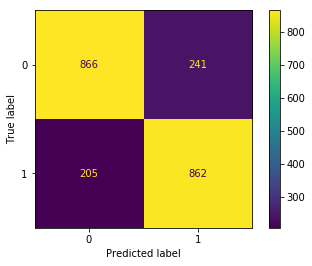

In [46]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_final, y_train)
knn_pred = rf.predict(X_valid_final);
print(classification_report(y_valid, knn_pred))
knncm = confusion_matrix(y_valid, knn_pred);
ConfusionMatrixDisplay(confusion_matrix=knncm).plot()

### SVC

              precision    recall  f1-score   support

       False       0.81      0.78      0.80      1107
        True       0.78      0.81      0.79      1067

    accuracy                           0.79      2174
   macro avg       0.80      0.80      0.79      2174
weighted avg       0.80      0.79      0.79      2174



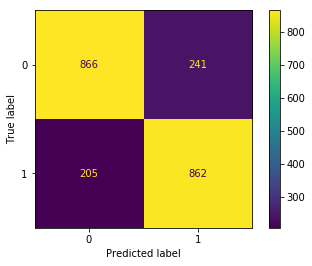

In [47]:
sv = SVC()
sv.fit(X_train_final, y_train)
sv_pred = rf.predict(X_valid_final);
print(classification_report(y_valid, sv_pred))
svcm = confusion_matrix(y_valid, sv_pred);
ConfusionMatrixDisplay(confusion_matrix=svcm).plot()

## Test dataset

In [48]:
df_test_original = pd.read_csv('data/test.csv', index_col='PassengerId');
df_test = df_test_original.copy()
df_test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
PassengerId,,,,,,,,,,,,
0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [49]:
df_test.drop(['Cabin', 'Name'], axis=1, inplace=True)

In [50]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4277 entries, 0013_01 to 9277_01
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4190 non-null   object 
 1   CryoSleep     4184 non-null   object 
 2   Destination   4185 non-null   object 
 3   Age           4186 non-null   float64
 4   VIP           4184 non-null   object 
 5   RoomService   4195 non-null   float64
 6   FoodCourt     4171 non-null   float64
 7   ShoppingMall  4179 non-null   float64
 8   Spa           4176 non-null   float64
 9   VRDeck        4197 non-null   float64
dtypes: float64(6), object(4)
memory usage: 367.6+ KB


### Preprocessing data

In [51]:
df_test.loc[:, num_cols] = numerical_imputer.transform(df_test[num_cols]);

In [52]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4277 entries, 0013_01 to 9277_01
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4190 non-null   object 
 1   CryoSleep     4184 non-null   object 
 2   Destination   4185 non-null   object 
 3   Age           4277 non-null   float64
 4   VIP           4184 non-null   object 
 5   RoomService   4277 non-null   float64
 6   FoodCourt     4277 non-null   float64
 7   ShoppingMall  4277 non-null   float64
 8   Spa           4277 non-null   float64
 9   VRDeck        4277 non-null   float64
dtypes: float64(6), object(4)
memory usage: 367.6+ KB


In [53]:
df_test.loc[:, cat_cols] = categorical_imputer.transform(df_test[cat_cols]);

In [54]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4277 entries, 0013_01 to 9277_01
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4277 non-null   object 
 1   CryoSleep     4277 non-null   bool   
 2   Destination   4277 non-null   object 
 3   Age           4277 non-null   float64
 4   VIP           4277 non-null   bool   
 5   RoomService   4277 non-null   float64
 6   FoodCourt     4277 non-null   float64
 7   ShoppingMall  4277 non-null   float64
 8   Spa           4277 non-null   float64
 9   VRDeck        4277 non-null   float64
dtypes: bool(2), float64(6), object(2)
memory usage: 309.1+ KB


In [55]:
ohe_test = pd.DataFrame(ohe.transform(df_test[cat_cols]));
ohe_test.index = df_test.index;
ohe_test.columns = ohe.get_feature_names()
ohe_test.head() 

,x0_Earth,x0_Europa,x0_Mars,x1_False,x1_True,x2_55 Cancri e,x2_PSO J318.5-22,x2_TRAPPIST-1e,x3_False,x3_True
PassengerId,,,,,,,,,,
0013_01,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
0018_01,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
0019_01,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
0021_01,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
0023_01,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [56]:
num_x_test = df_test.drop(cat_cols, axis=1)
df_test = pd.concat([num_x_test, ohe_test], axis=1)

In [57]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4277 entries, 0013_01 to 9277_01
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               4277 non-null   float64
 1   RoomService       4277 non-null   float64
 2   FoodCourt         4277 non-null   float64
 3   ShoppingMall      4277 non-null   float64
 4   Spa               4277 non-null   float64
 5   VRDeck            4277 non-null   float64
 6   x0_Earth          4277 non-null   float64
 7   x0_Europa         4277 non-null   float64
 8   x0_Mars           4277 non-null   float64
 9   x1_False          4277 non-null   float64
 10  x1_True           4277 non-null   float64
 11  x2_55 Cancri e    4277 non-null   float64
 12  x2_PSO J318.5-22  4277 non-null   float64
 13  x2_TRAPPIST-1e    4277 non-null   float64
 14  x3_False          4277 non-null   float64
 15  x3_True           4277 non-null   float64
dtypes: float64(16)
memory usage: 568.0+ KB

In [58]:
df_test.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,x0_Earth,x0_Europa,x0_Mars,x1_False,x1_True,x2_55 Cancri e,x2_PSO J318.5-22,x2_TRAPPIST-1e,x3_False,x3_True
PassengerId,,,,,,,,,,,,,,,,
0013_01,27.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
0018_01,19.0,0.0,9.0,0.0,2823.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
0019_01,31.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
0021_01,38.0,0.0,6652.0,0.0,181.0,585.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
0023_01,20.0,10.0,0.0,635.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


### Getting prediction using Random Forest

In [59]:
pred = rf.predict(df_test); 
res = pd.DataFrame( { 'PassengerId' : df_test.index, 'Transported': pred })

In [60]:
res.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [61]:
res.to_csv('submission.csv', index=False)

### Score on Kaggle
<img src="https://raw.githubusercontent.com/AnneLivia/SpaceshipPrediction/main/scores/score1.png?token=GHSAT0AAAAAABOANCYQQQAIAGZQ5PBOU6FMYRYX5TA"/>

## Using pipeline and Normalizing / Standardizing data

In [62]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

### Testing using only Random Forest and MLP

In [63]:
preprocess_num_sta = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', StandardScaler())
])

preprocess_num_norm = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('norm', MinMaxScaler())
])

preprocess_cat = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])

col_transform_norm = ColumnTransformer(transformers=[ 
    ('categorical', preprocess_cat, cat_cols),
    ('numerical', preprocess_num_norm, num_cols),
])


col_transform_sta = ColumnTransformer(transformers=[ 
    ('categorical', preprocess_cat, cat_cols),
    ('numerical', preprocess_num_sta, num_cols),
])

### Pipeline Random Forest

              precision    recall  f1-score   support

       False       0.81      0.79      0.80      1107
        True       0.78      0.81      0.80      1067

    accuracy                           0.80      2174
   macro avg       0.80      0.80      0.80      2174
weighted avg       0.80      0.80      0.80      2174



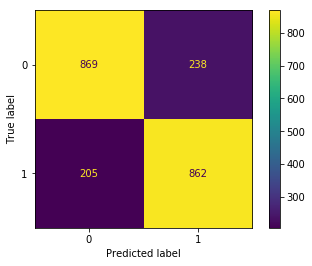

In [64]:
pipe_norm_rf = Pipeline(steps=[ 
    ('preprocess', col_transform_norm),
    ('model_rf', RandomForestClassifier(random_state=40, n_estimators=400, min_samples_split=40))
])


pipe_norm_rf.fit(X_train, y_train)
pipe_norm_rf_pred = pipe_norm_rf.predict(X_valid);
print(classification_report(y_valid, pipe_norm_rf_pred))
pipe_norm_rfcm = confusion_matrix(y_valid, pipe_norm_rf_pred);
ConfusionMatrixDisplay(confusion_matrix=pipe_norm_rfcm).plot()


              precision    recall  f1-score   support

       False       0.81      0.79      0.80      1107
        True       0.78      0.81      0.80      1067

    accuracy                           0.80      2174
   macro avg       0.80      0.80      0.80      2174
weighted avg       0.80      0.80      0.80      2174



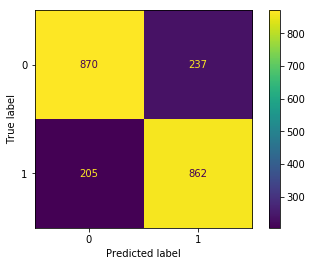

In [65]:
pipe_sta_rf = Pipeline(steps=[ 
    ('preprocess', col_transform_sta),
    ('model_rf', RandomForestClassifier(random_state=40, n_estimators=400, min_samples_split=40))
])

pipe_sta_rf.fit(X_train, y_train)
pipe_sta_rf_pred = pipe_sta_rf.predict(X_valid);
print(classification_report(y_valid, pipe_sta_rf_pred))
pipe_sta_rfcm = confusion_matrix(y_valid, pipe_sta_rf_pred);
ConfusionMatrixDisplay(confusion_matrix=pipe_sta_rfcm).plot()

### Pipeline MLP

              precision    recall  f1-score   support

       False       0.84      0.70      0.76      1107
        True       0.74      0.87      0.80      1067

    accuracy                           0.78      2174
   macro avg       0.79      0.78      0.78      2174
weighted avg       0.79      0.78      0.78      2174



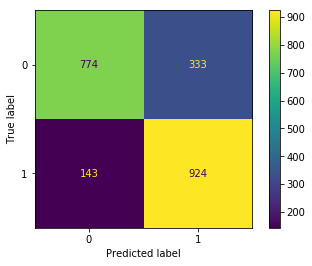

In [66]:
pipe_norm_mlp = Pipeline(steps=[ 
    ('preprocess', col_transform_norm),
    ('model_rf', 
    MLPClassifier(
        hidden_layer_sizes=(50, 40, 50),
        activation='relu',
        max_iter=1000,
        batch_size=64,
        random_state=40
    ))
])


pipe_norm_mlp.fit(X_train, y_train)
pipe_norm_mlp_pred = pipe_norm_mlp.predict(X_valid);
print(classification_report(y_valid, pipe_norm_mlp_pred))
pipe_norm_mlpcm = confusion_matrix(y_valid, pipe_norm_mlp_pred);
ConfusionMatrixDisplay(confusion_matrix=pipe_norm_mlpcm).plot()

              precision    recall  f1-score   support

       False       0.82      0.76      0.79      1107
        True       0.77      0.83      0.80      1067

    accuracy                           0.79      2174
   macro avg       0.79      0.79      0.79      2174
weighted avg       0.79      0.79      0.79      2174



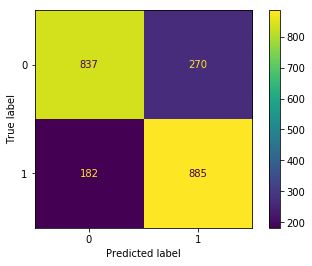

In [67]:
pipe_sta_mlp = Pipeline(steps=[ 
    ('preprocess', col_transform_sta),
    ('model_rf', 
    MLPClassifier(
        hidden_layer_sizes=(10, 5, 10),
        activation='relu',
        max_iter=1000,
        batch_size=210,
        random_state=40
    ))
])


pipe_sta_mlp.fit(X_train, y_train)
pipe_sta_mlp_pred = pipe_sta_mlp.predict(X_valid);
print(classification_report(y_valid, pipe_sta_mlp_pred))
pipe_sta_mlpcm = confusion_matrix(y_valid, pipe_sta_mlp_pred);
ConfusionMatrixDisplay(confusion_matrix=pipe_sta_mlpcm).plot()

## Using best pipeline on Test Set

In [68]:
pred_pipe = pipe_sta_rf.predict(df_test_original); 
res_pipe = pd.DataFrame( { 'PassengerId' : df_test_original.index, 'Transported': pred_pipe })

C:\Users\annel\Anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:440: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


In [69]:
res_pipe.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [70]:
res_pipe.to_csv('submission_pipe_version.csv', index=False)

### Score on Kaggle
<img src="https://raw.githubusercontent.com/AnneLivia/SpaceshipPrediction/main/scores/score2.png?token=GHSAT0AAAAAABOANCYRG2A3BEK44KII3EZYYRYX56Q"/>